# Maestría en Maestría en Ciencia de Datos e Inteligencia Artificial
#### 8. Machine Learning and Deep Learning
#### Docente: Msc. Renzo Claure Aracena.

### Kmeans

#### *Ejemplo artificial*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
# Generar datos de ejemplo
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

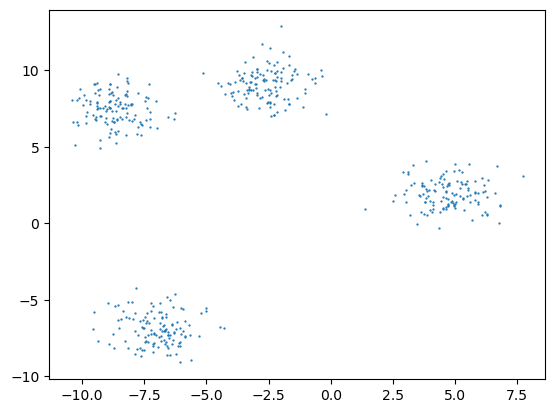

In [3]:
plt.figure()
plt.scatter(x=X[:,0], y=X[:,1], s=0.4)
plt.show()

In [4]:
X[:,0].min(), X[:,0].max()

(np.float64(-10.422230580121735), np.float64(7.718759644683339))

In [5]:
X[:,1].min(), X[:,1].max()

(np.float64(-9.091244902283831), np.float64(12.867017618853042))

In [6]:
kmean = KMeans(n_clusters=4)
kmean.fit(X)

C:\Users\renzo\miniconda3\envs\base_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4)

In [7]:
#Centroides
kmean.cluster_centers_

array([[-7.0009649 , -6.90445754],
       [-2.60221541,  9.09243505],
       [-8.68153751,  7.4554521 ],
       [ 4.72182456,  1.9238556 ]])

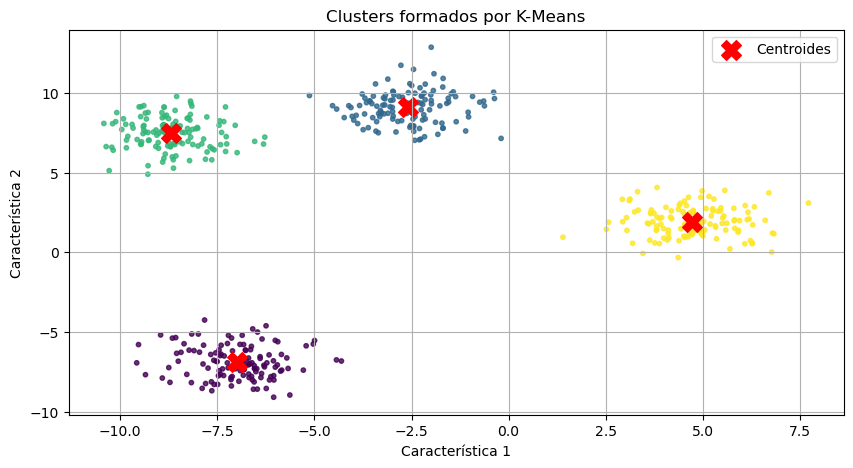

In [8]:
#Graficar los cluster y sus centroides
labels = kmean.labels_
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, alpha=0.8)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title('Clusters formados por K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid()
plt.show()

C:\Users\renzo\miniconda3\envs\base_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\renzo\miniconda3\envs\base_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\renzo\miniconda3\envs\base_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\renzo\miniconda3\envs\base_ds_env\lib\site-packages\sklearn\cluster\_kmea

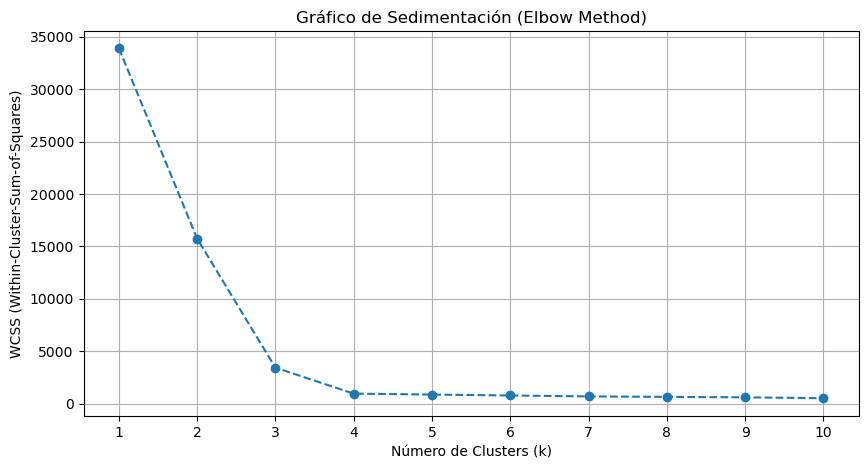

In [11]:
#Efecto de la cantidad de clusters
# Gráfico de sedimentación (Elbow Method)
wcss = []  # Within-Cluster-Sum-of-Squares
k_values = range(1, 11)  # Probamos de 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia es la suma de las distancias al cuadrado

plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Gráfico de Sedimentación (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.xticks(k_values)
plt.grid()
plt.show()

In [12]:
#Calidad de los Clusters
# Análisis de siluetas
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = silhouette_score(X, labels)
print(f"Coeficiente de silueta promedio: {silhouette_avg:.2f}")

# Graficar el análisis de siluetas
sample_silhouette_values = silhouette_samples(X, labels)


Coeficiente de silueta promedio: 0.79


In [13]:
def plot_silhouette_analysis(X, labels, n_clusters):
    """
    Genera un gráfico de siluetas para evaluar la calidad del clustering.

    Parámetros:
    -----------
    X : array-like (n_samples, n_features)
        Datos utilizados para el clustering

    labels : array-like (n_samples,)
        Etiquetas de cluster asignadas a cada muestra

    n_clusters : int
        Número total de clusters
    """
    silhouette_avg = silhouette_score(X, labels)
    print(f"Coeficiente de silueta promedio: {silhouette_avg:.2f}")

    sample_silhouette_values = silhouette_samples(X, labels)

    plt.figure(figsize=(10, 5))
    y_lower = 10

    for i in range(n_clusters):
        cluster_silhouette_values = sample_silhouette_values[labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhouette_values,
                          alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.title('Análisis de Siluetas')
    plt.xlabel('Coeficiente de Silueta')
    plt.ylabel('Cluster')
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.grid(True)
    plt.show()

Coeficiente de silueta promedio: 0.79


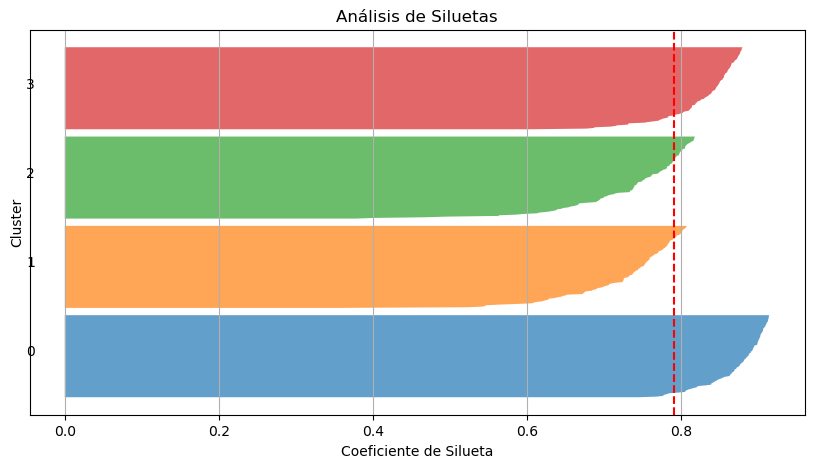

In [14]:
plot_silhouette_analysis(X, kmean.labels_, n_clusters=4)

#### *Ejemplo Real*

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [16]:
data = load_iris()

In [17]:
X = data.data
y = data.target

In [18]:
target_name = data.target_names

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\renzo\miniconda3\envs\base_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


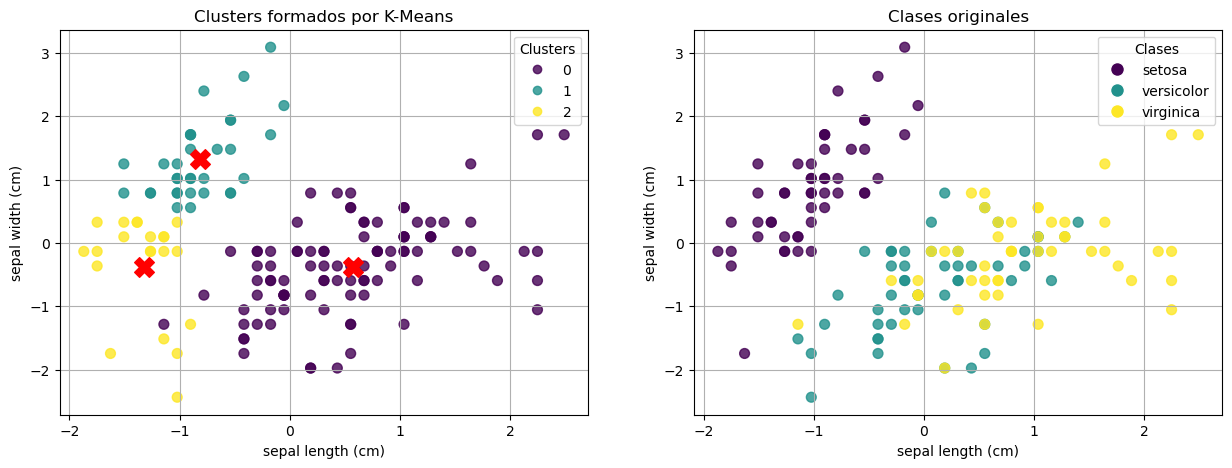

In [20]:
# Aplicar K-Means
kmeans_2 = KMeans(n_clusters=3, random_state=42)
kmeans_2.fit(X_scaled)
klabels = kmeans_2.labels_  # Etiquetas de los clusters

#Clusters y sus centroides
fig = plt.figure(figsize=(15, 5))

# Clusters formados por K-Means
ax0 = fig.add_subplot(1, 2, 1)
scatter0 = ax0.scatter(X_scaled[:, 0], X_scaled[:, 1], c=klabels, cmap='viridis', s=50, alpha=0.8)
ax0.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
ax0.set_title('Clusters formados por K-Means')
ax0.set_xlabel(data.feature_names[0])
ax0.set_ylabel(data.feature_names[1])
ax0.legend(*scatter0.legend_elements(), title="Clusters")
ax0.grid()

# Clases originales
ax1 = fig.add_subplot(1, 2, 2)
scatter1 = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
ax1.set_title('Clases originales')
ax1.set_xlabel(data.feature_names[0])
ax1.set_ylabel(data.feature_names[1])

# Crear manualmente los elementos de la leyenda para las clases originales
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / 2), markersize=10) for i in range(3)]
ax1.legend(handles, target_name, title="Clases")
ax1.grid()

plt.show()

Coeficiente de silueta promedio: 0.52


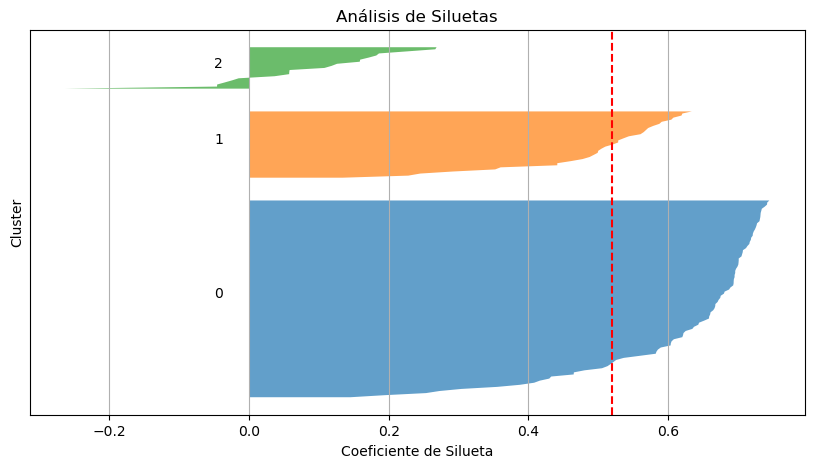

In [21]:
plot_silhouette_analysis(X, klabels, n_clusters=3)

### DBSCAN

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

#### *Datos artificiales*

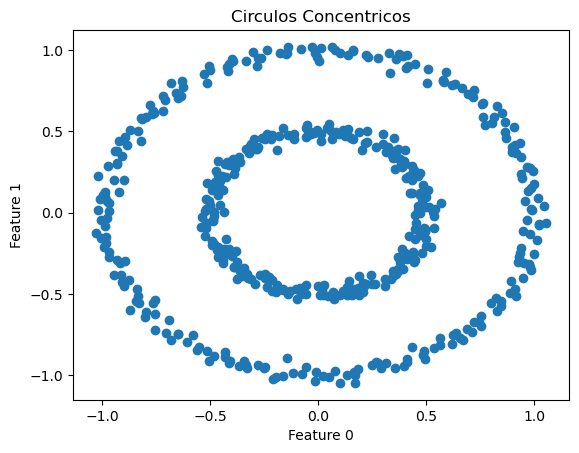

In [23]:
X, _ = make_circles(n_samples=500, factor=.5, noise=.03, random_state=4)

# Plotting
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.title("Circulos Concentricos")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [24]:
#Aplicando DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

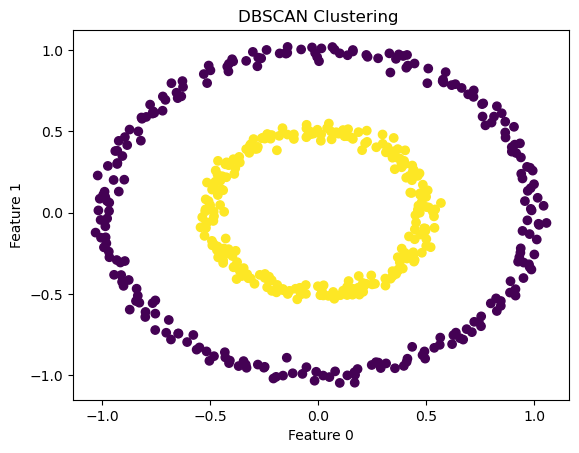

In [25]:
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering ")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

#### *Datos reales*

In [26]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

In [27]:
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

In [28]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
df['target'] = california_housing.target

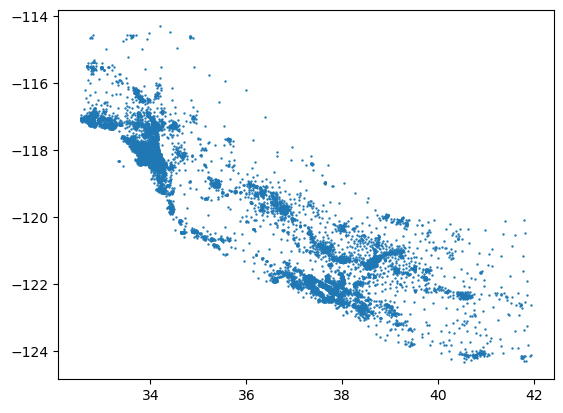

In [30]:
#Gráfico de dispersión
plt.figure()
plt.scatter(x=df['Latitude'], y=df['Longitude'], s=0.5)
plt.show()

In [31]:
#Crear un grafico de georeferencias
X = df[['Latitude', 'Longitude']].to_numpy()
dbscan = DBSCAN() #DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)
df['labels'] = labels

In [33]:
df['labels'].value_counts()

labels
 0    20634
-1        6
Name: count, dtype: int64

In [34]:
def graf_dbscan(x, y, labels):
    """
    Grafica los puntos georeferenciados con colores según los clusters obtenidos por DBSCAN.
    """
    plt.figure(figsize=(8, 6))

    # Hacer el scatter plot con etiquetas por grupo
    scatter = plt.scatter(x, y, 
                        s=0.5, c=labels, cmap='viridis')

    # Crear leyenda manual
    legend_labels = np.unique(labels)

    # Agregar leyenda con identificadores de cluster
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                                label=f'Cluster {label}', 
                                markerfacecolor=scatter.cmap(scatter.norm(label)), 
                                markersize=6) for label in legend_labels]

    plt.legend(handles=legend_handles, title="Clusters", loc='best')
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.title("Clusters con leyenda de colores")
    plt.grid(True)
    plt.show()

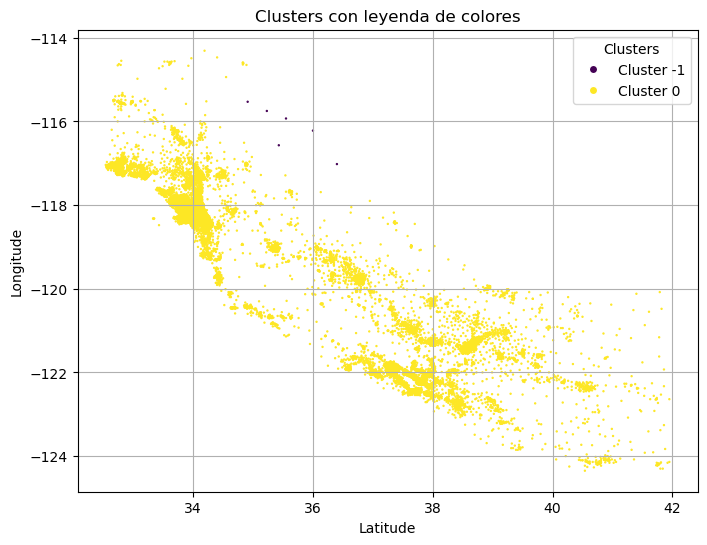

In [35]:
graf_dbscan(df['Latitude'], df['Longitude'], df['labels'])

In [36]:
#La calidad es muy pobre
df['labels'].value_counts()

labels
 0    20634
-1        6
Name: count, dtype: int64

In [37]:
from sklearn.metrics import silhouette_score, silhouette_samples
mask = df['labels'] != -1  # Excluir ruido (-1)
x_valid = df.loc[mask, ['Latitude', 'Longitude']]
labels_valid = df.loc[mask, 'labels']
silhouette_avg = silhouette_score(x_valid, labels_valid)
print(f"Coeficiente de silueta promedio: {silhouette_avg:.2f}")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [38]:
#Alterando los hyperparametros
dbscan = DBSCAN(eps=0.32, min_samples=18) 
labels = dbscan.fit_predict(X)
df['labels2'] = labels

In [39]:
df['labels2'].value_counts()

labels2
 2    11430
 0     8884
-1      207
 1      119
Name: count, dtype: int64

In [40]:
mask = df['labels2'] != -1  # Excluir ruido (-1)
x_valid = df.loc[mask, ['Latitude', 'Longitude']]
labels_valid = df.loc[mask, 'labels2']
silhouette_avg = silhouette_score(x_valid, labels_valid)
print(f"Coeficiente de silueta promedio: {silhouette_avg:.2f}")

Coeficiente de silueta promedio: 0.68


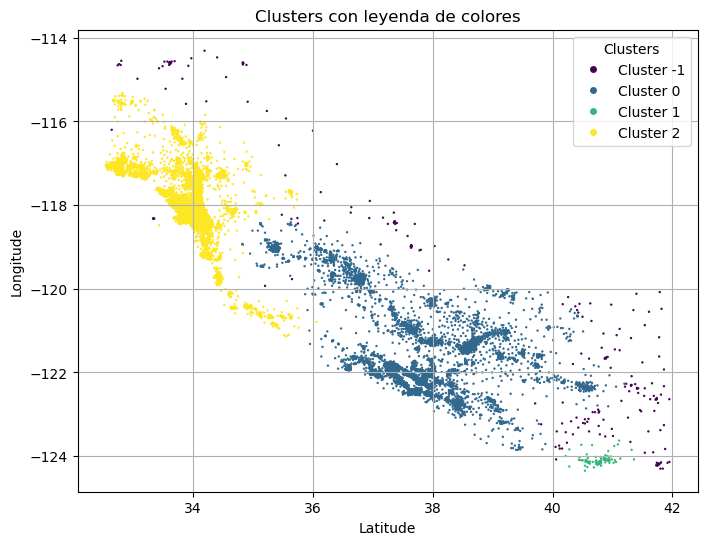

In [41]:

# Graficar los clusters con los nuevos parámetros
graf_dbscan(df['Latitude'], df['Longitude'], df['labels2'])


In [42]:
#Alterando los hyperparametros
dbscan = DBSCAN(eps=0.20, min_samples=20) 
labels = dbscan.fit_predict(X)
df['labels3'] = labels

In [44]:
df['labels3'].value_counts()

labels2
 5    11243
 0     8536
-1      529
 2      109
 1       98
 3       98
 4       27
Name: count, dtype: int64

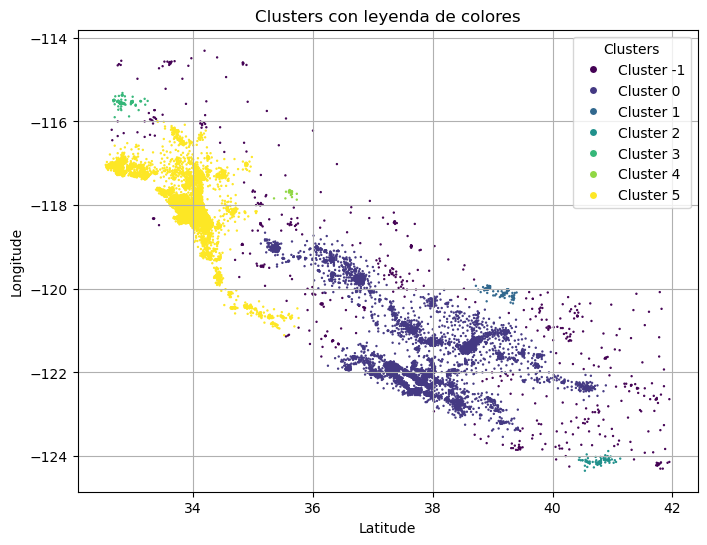

In [45]:
graf_dbscan(df['Latitude'], df['Longitude'], df['labels3'])

In [46]:
mask = df['labels3'] != -1  # Excluir ruido (-1)
x_valid = df.loc[mask, ['Latitude', 'Longitude']]
labels_valid = df.loc[mask, 'labels3']
silhouette_avg = silhouette_score(x_valid, labels_valid)
print(f"Coeficiente de silueta promedio: {silhouette_avg:.2f}")

Coeficiente de silueta promedio: 0.38
